## Test diameters and noise levels for CD7 image

In this notebook I try cellposesam with various diameters and variout noise levels on the image provided by Archie Harding in [this question](https://forum.image.sc/t/segmenting-cell-image-from-cd7-microscope/114316)

The image is composite of a bright field image and a Hoeschst image with some further explanation regarding Hoechst provided by Jorge Ramirez.


> Hoechst is a nucleic acid stain whose Ex/Em spectra (similar to DAPI) is around ex_350/em_450. For this reason, we tend to give it a Blueish lookup table (similar to DAPI). I guess this image is a composite of a Brightfield image + a Hoechst (Fluorescence) image.



Cellpose version: 4.0.1 (major number: 4)


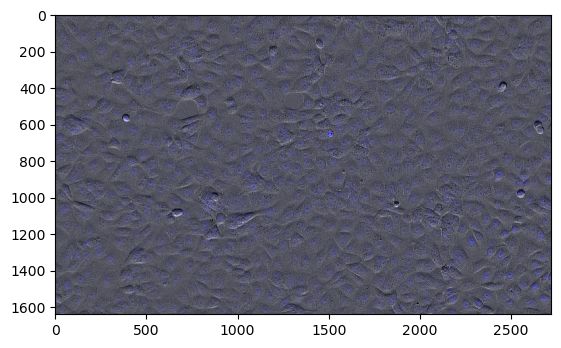

In [4]:
import random
from skimage.io import imread
import matplotlib.pyplot as plt
import cellpose
from cellpose import models, io
import os
try:
    from tnia.plotting.plt_helper import random_label_cmap
    cmap = random_label_cmap()
except ImportError:
    cmap = None

parent_dir = r'D:\images\tnia-python-images\imagesc\2025_07_28_CD7'
name = 'CD7_CALU3_Hoechst.tiff'
name_without_extension = name.split('.')[0]
image = imread(os.path.join(parent_dir, name))

plt.imshow(image, cmap='gray')

major_number = cellpose.version.split('.')[0]
print(f"Cellpose version: {cellpose.version} (major number: {major_number})")

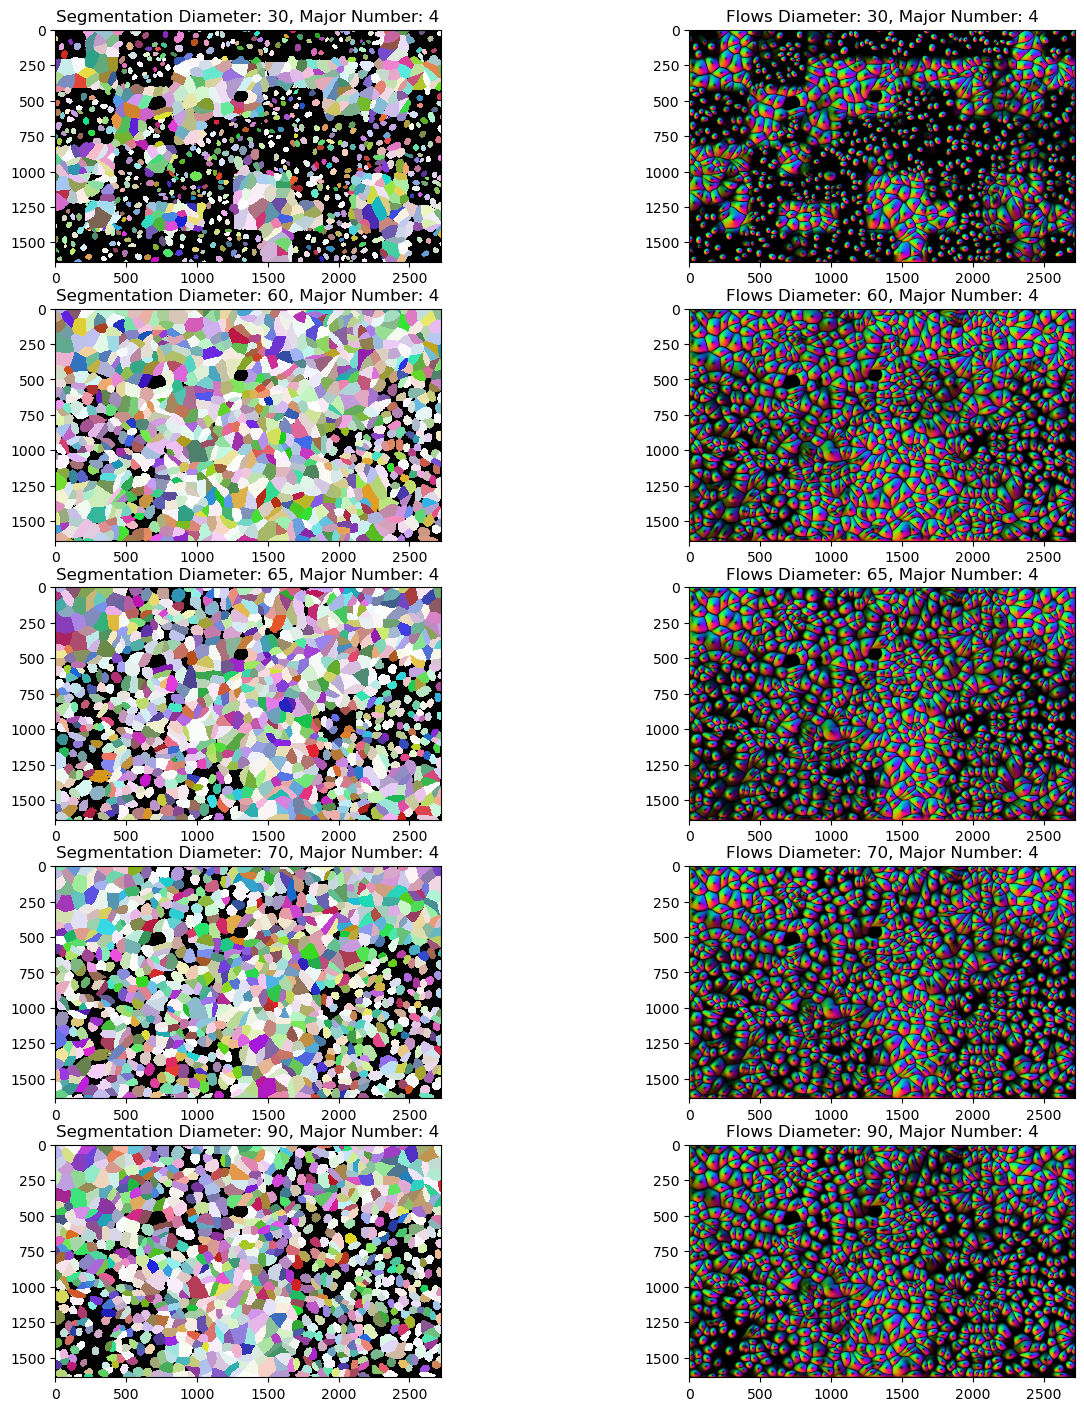

In [5]:
if major_number == '3':
    model = models.Cellpose(gpu=True, model_type='cyto3')
elif major_number == '4':
    model = models.CellposeModel(gpu=True)

diameters = [30, 60, 65, 70, 90]

fig, axes = plt.subplots(len(diameters), 2, figsize=(15, len(diameters) * 3.5))

for row, d in enumerate(diameters):
    result = model.eval(image, cellprob_threshold=-1, flow_threshold=0, diameter=d)


    axes[row,0].imshow(result[0], cmap=cmap)
    axes[row,0].set_title(f"Segmentation Diameter: {d}, Major Number: {major_number}")
    axes[row,1].imshow(result[1][0])
    axes[row,1].set_title(f"Flows Diameter: {d}, Major Number: {major_number}")

fig.savefig(f'cellpose_diameter_{name_without_extension}_{cellpose.version}.png', dpi=300, bbox_inches='tight')

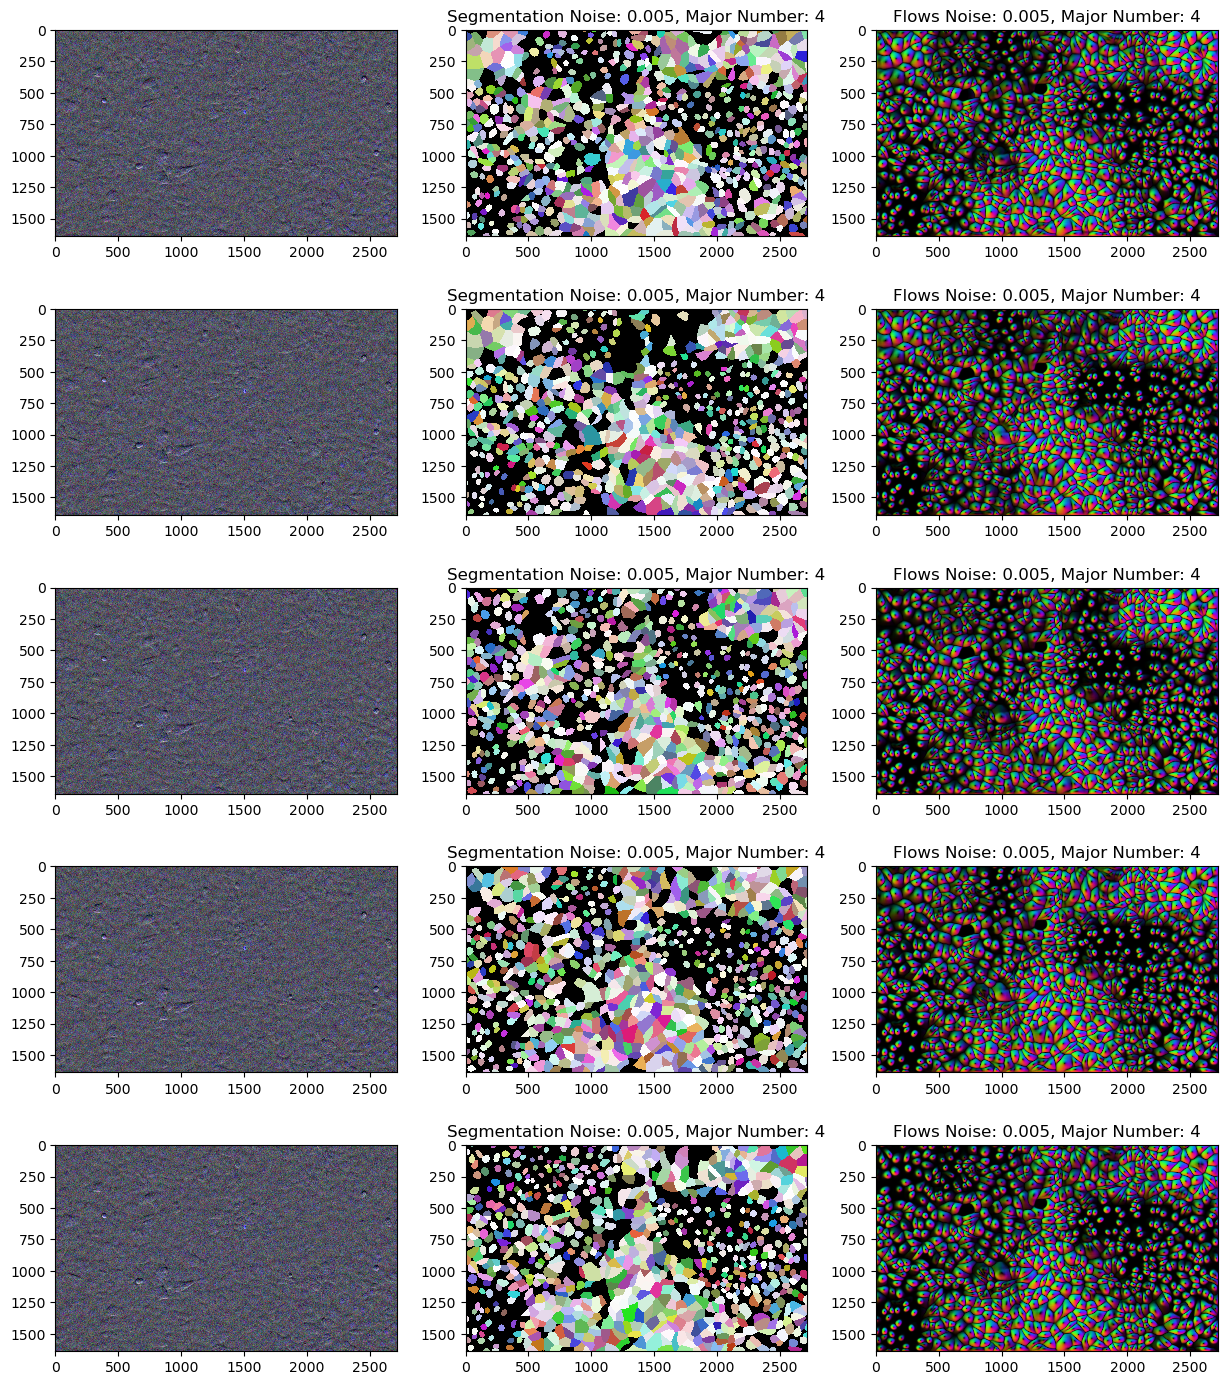

In [10]:
from skimage import util
# different noise levels
noise_levels = [0.005, 0.005, 0.005, 0.005, 0.005]
fig, axes = plt.subplots(len(noise_levels), 3, figsize=(15, len(noise_levels) * 3.5))

row = 0
for row, noise in enumerate(noise_levels):
    # Add noise to the image
    noisy_image = image + noise * random.random() * image.std()
    noisy_image = util.random_noise(image, mode='gaussian', var=noise)
    
    result = model.eval(noisy_image, cellprob_threshold=-0.8, niter=2000, diameter=60)

    axes[row,0].imshow(noisy_image/noisy_image.max(), cmap='gray')
    axes[row,1].imshow(result[0], cmap=cmap)
    axes[row,1].set_title(f"Segmentation Noise: {noise}, Major Number: {major_number}")
    axes[row,2].imshow(result[1][0])
    axes[row,2].set_title(f"Flows Noise: {noise}, Major Number: {major_number}")

fig.savefig(f'cellpose_noise_{name_without_extension}_{cellpose.version}.png', dpi=300, bbox_inches='tight')